<a href="https://colab.research.google.com/github/Susanna-Salata/Sigma-University/blob/main/Sigma_HW_7_Susanna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Завдання.

І рівень складності 7 балів, Завдання 1 типу.

Реалізувати кластеризацію вхідних даних, отриманих Вами у ході виконання Дз_1, модельних та (або) реальних – на власний вибір. Методи Machine Learning з переліку: k-means (k-середніх); Support Vector Machine (машина опорних векторів); k-nearest neighbors (найближчих сусідів); ієрархічна кластеризація – для кластеризації обраних даних обрати самостійно.

Провести аналіз отриманих результатів, сформувати висновки.


## HW-1

In [61]:
'''

Виконала: Сусанна Салата
Homework_1, варіант 4,

І рівень складності:
Закон зміни похибки – рівномірний;
Закон зміни досліджуваного процесу (тренду) – лінійний.
Реальні дані – 3 показника на вибір.


Package                      Version
---------------------------- -----------

pip                          23.1
numpy                        1.23.5
pandas                       1.5.3
xlrd                         2.0.1
matplotlib                   3.6.2

'''

import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
%matplotlib inline

import re
from bs4 import BeautifulSoup
import requests
import json
from sklearn import decomposition

In [10]:
# ---------------------- ФУНКЦІЇ тестової аддитивної моделі -------------------------

# ----------- рівномірний закон розводілу номерів АВ в межах вибірки ----------------
def randomAM (n):

    '''

    :param n: кількість реалізацій ВВ - об'єм вибірки
    :return: номери АВ
    '''

    SAV = np.zeros((nAV))
    S = np.zeros((n))
    for i in range(n):
        S[i] = np.random.randint(0, iter)  # параметри закону задаются межами аргументу
    mS = np.median(S)
    dS = np.var(S)
    scvS = mt.sqrt(dS)
    # -------------- генерація номерів АВ за рівномірним законом  -------------------
    for i in range(nAV):
        SAV[i] = mt.ceil(np.random.randint(1, iter))  # рівномірний розкид номерів АВ в межах вибірки розміром 0-iter
    print('номери АВ: SAV=', SAV)
    print('----- статистичні характеристики РІВНОМІРНОГО закону розподілу ВВ -----')
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('-----------------------------------------------------------------------')
    # гістограма закону розподілу ВВ
    plt.hist(S, bins=20, facecolor="blue", alpha=0.5)
    plt.show()
    return SAV


# ------------------------- нормальний закон розводілу ВВ ----------------------------
def randoNORM(dm, dsig, iter):
    '''

    :param dm:
    :param dsig:
    :param iter:
    :return:
    '''

    S = np.random.normal(dm, dsig, iter)  # Нормальний закон розподілу ВВ з вибіркою об'ємом iter та параметрами: dm, dsig
    mS = np.median(S)
    dS = np.var(S)
    scvS = mt.sqrt(dS)
    print('------- статистичні характеристики НОРМАЛЬНОЇ похибки вимірів -----')
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('------------------------------------------------------------------')
    # гістограма закону розподілу ВВ
    plt.hist(S, bins=20, facecolor="blue", alpha=0.5)
    plt.show()
    return S


In [11]:
# ------------------- модель ідеального тренду (лінійний закон)  ------------------
def Model (n):
    S0=np.zeros((n))
    for i in range(n):
        S0[i]=(0.025*i+10)    # лінійна модель реального процесу
    return S0

# ---------------- модель виміру (квадратичний закон) з нормальний шумом ---------------
def Model_NORM (SN, S0N, n):
    SV=np.zeros((n))
    for i in range(n):
        SV[i] = S0N[i]+SN[i]
    return SV

# ----- модель виміру (лінійний закон) з нормальний шумом + АНОМАЛЬНІ ВИМІРИ
def Model_NORM_AV (S0, SV, nAV, Q_AV):
    SV_AV = SV
    SSAV = np.random.uniform(dm, (Q_AV * dsig), nAV)  # аномальна випадкова похибка з рівномірним законом
    for i in range(nAV):
        k=int (SAV[i])
        SV_AV[k] = S0[k] + SSAV[i]        # аномальні вимірів з рівномірно розподіленими номерами
    return SV_AV

# --------------- графіки тренда, вимірів з нормальним шумом  ---------------------------
def Plot_AV (S0_L, SV_L, Text):
    plt.clf()
    plt.plot(SV_L)
    plt.plot(S0_L)
    plt.ylabel(Text)
    plt.show()
    return

In [12]:
# ----- статистичні характеристики вхідної вибірки  --------
def Stat_characteristics_in (SL, Text):
    # статистичні характеристики вибірки з урахуванням тренду
    Yout = MNK_Stat_characteristics(SL)
    iter = len(Yout)
    SL0 = np.zeros((iter ))
    for i in range(iter):
        SL0[i] = SL[i] - Yout[i, 0]
    mS = np.median(SL0)
    dS = np.var(SL0)
    scvS = mt.sqrt(dS)
    print('------------', Text ,'-------------')
    print('кількість елементів вбірки=', iter)
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('-----------------------------------------------------')
    return

# ----- статистичні характеристики лінії тренда  --------
def Stat_characteristics_out (SL_in, SL, Text):
    # статистичні характеристики вибірки з урахуванням тренду
    Yout = MNK_Stat_characteristics(SL)
    iter = len(Yout)
    SL0 = np.zeros((iter ))
    for i in range(iter):
        SL0[i] = SL[i,0] - Yout[i, 0]
    mS = np.median(SL0)
    dS = np.var(SL0)
    scvS = mt.sqrt(dS)
    # глобальне лінійне відхилення оцінки - динамічна похибка моделі
    Delta = 0
    for i in range(iter):
        Delta = Delta + abs(SL_in[i] - Yout[i, 0])
    Delta_average_Out = Delta / (iter + 1)
    print('------------', Text ,'-------------')
    print('кількість елементів ивбірки=', iter)
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('Динамічна похибка моделі=', Delta_average_Out)
    print('-----------------------------------------------------')
    return

# ----- статистичні характеристики екстраполяції  --------
def Stat_characteristics_extrapol (koef, SL, Text):
    # статистичні характеристики вибірки з урахуванням тренду
    Yout = MNK_Stat_characteristics(SL)
    iter = len(Yout)
    SL0 = np.zeros((iter ))
    for i in range(iter):
        SL0[i] = SL[i,0] - Yout[i, 0]
    mS = np.median(SL0)
    dS = np.var(SL0)
    scvS = mt.sqrt(dS)
    #  довірчий інтервал прогнозованих значень за СКВ
    scvS_extrapol = scvS * koef
    print('------------', Text ,'-------------')
    print('кількість елементів ивбірки=', iter)
    print('матиматичне сподівання ВВ=', mS)
    print('дисперсія ВВ =', dS)
    print('СКВ ВВ=', scvS)
    print('Довірчий інтервал прогнозованих значень за СКВ=', scvS_extrapol)
    print('-----------------------------------------------------')
    return

# ------------- МНК згладжуваннядля визначення стат. характеристик -------------
def MNK_Stat_characteristics (S0):
    iter = len(S0)
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT=F.T
    FFT = FT.dot(F)
    FFTI=np.linalg.inv(FFT)
    FFTIFT=FFTI.dot(FT)
    C=FFTIFT.dot(Yin)
    Yout=F.dot(C)
    return Yout


# ------------------------------ МНК згладжування -------------------------------------
def MNK (S0):
    iter = len(S0)
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT=F.T
    FFT = FT.dot(F)
    FFTI=np.linalg.inv(FFT)
    FFTIFT=FFTI.dot(FT)
    C=FFTIFT.dot(Yin)
    Yout=F.dot(C)
    print('Регресійна модель:')
    print('y(t) = ', C[0,0], ' + ', C[1,0], ' * t', ' + ', C[2,0], ' * t^2')
    return Yout

# ------------------------ МНК детекція та очищення АВ ------------------------------
def MNK_AV_Detect (S0):
    iter = len(S0)
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT=F.T
    FFT = FT.dot(F)
    FFTI=np.linalg.inv(FFT)
    FFTIFT=FFTI.dot(FT)
    C=FFTIFT.dot(Yin)
    return C[1,0]

# ---------------------------  МНК ПРОГНОЗУВАННЯ -------------------------------
def MNK_Extrapol (S0, koef):
    iter = len(S0)
    Yout_Extrapol = np.zeros((iter+koef, 1))
    Yin = np.zeros((iter, 1))
    F = np.ones((iter, 3))
    for i in range(iter):  # формування структури вхідних матриць МНК
        Yin[i, 0] = float(S0[i])  # формування матриці вхідних даних
        F[i, 1] = float(i)
        F[i, 2] = float(i * i)
    FT=F.T
    FFT = FT.dot(F)
    FFTI=np.linalg.inv(FFT)
    FFTIFT=FFTI.dot(FT)
    C=FFTIFT.dot(Yin)
    print('Регресійна модель:')
    print('y(t) = ', C[0, 0], ' + ', C[1, 0], ' * t', ' + ', C[2, 0], ' * t^2')
    for i in range(iter+koef):
        Yout_Extrapol[i, 0] = C[0, 0]+C[1, 0]*i+(C[2, 0]*i*i)   # проліноміальна крива МНК - прогнозування
    return Yout_Extrapol


номери АВ: SAV= [2.753e+03 1.047e+03 8.779e+03 7.793e+03 5.226e+03 1.471e+03 6.505e+03
 6.670e+03 8.710e+02 9.782e+03 6.423e+03 5.021e+03 7.569e+03 7.720e+03
 6.573e+03 5.861e+03 2.223e+03 5.887e+03 8.085e+03 3.864e+03 3.191e+03
 9.823e+03 5.086e+03 5.486e+03 2.099e+03 8.059e+03 4.300e+01 5.862e+03
 8.467e+03 8.320e+03 3.354e+03 1.616e+03 4.030e+03 1.336e+03 6.950e+03
 6.833e+03 3.746e+03 6.802e+03 1.645e+03 5.226e+03 2.010e+03 9.879e+03
 6.561e+03 4.183e+03 8.063e+03 1.284e+03 7.140e+03 1.530e+03 5.451e+03
 1.340e+03 7.956e+03 6.810e+03 2.332e+03 2.665e+03 4.322e+03 4.008e+03
 5.427e+03 3.318e+03 3.315e+03 2.993e+03 1.820e+03 9.667e+03 5.012e+03
 4.461e+03 9.888e+03 7.210e+02 9.016e+03 3.363e+03 6.598e+03 9.484e+03
 1.352e+03 9.726e+03 8.808e+03 3.572e+03 5.477e+03 5.700e+02 3.418e+03
 5.078e+03 3.944e+03 9.508e+03 7.629e+03 1.520e+02 2.941e+03 1.030e+03
 9.708e+03 3.929e+03 3.420e+03 5.372e+03 7.320e+02 2.407e+03 2.297e+03
 9.985e+03 4.534e+03 4.277e+03 5.694e+03 2.600e+01 2.453e+03 

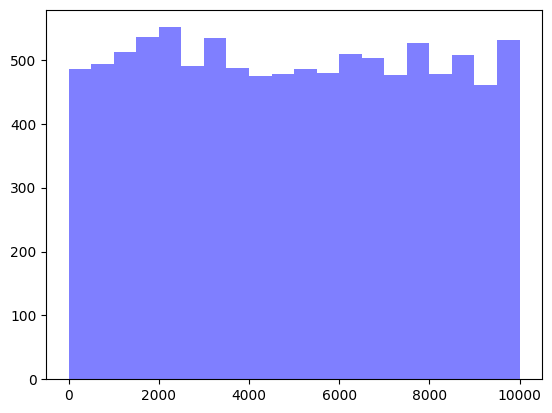

------- статистичні характеристики НОРМАЛЬНОЇ похибки вимірів -----
матиматичне сподівання ВВ= -0.17531472473602808
дисперсія ВВ = 24.77489062540977
СКВ ВВ= 4.9774381588734755
------------------------------------------------------------------


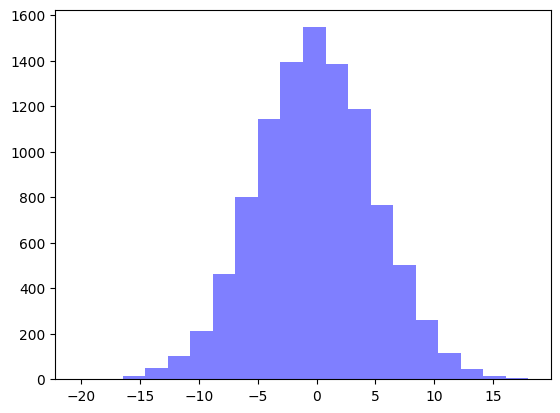

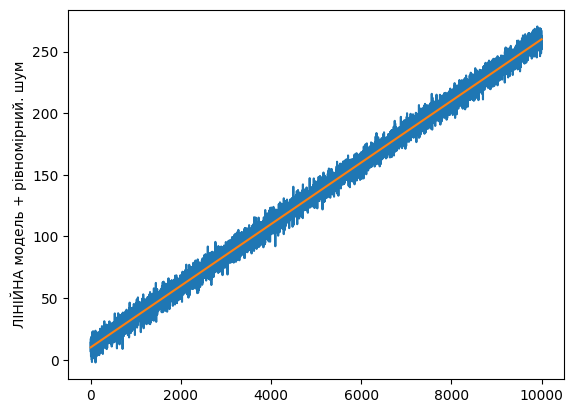

------------ Вибірка + рівномірний. шум -------------
кількість елементів вбірки= 10000
матиматичне сподівання ВВ= -0.06638007269401669
дисперсія ВВ = 24.77247351649793
СКВ ВВ= 4.977195346427336
-----------------------------------------------------


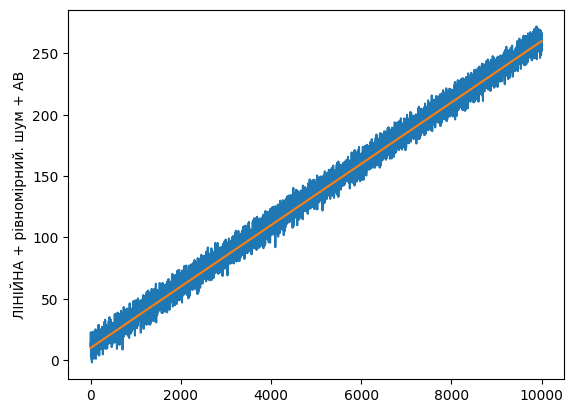

------------ Вибірка з АВ -------------
кількість елементів вбірки= 10000
матиматичне сподівання ВВ= -0.14116943436546592
дисперсія ВВ = 29.360450947693298
СКВ ВВ= 5.418528485455558
-----------------------------------------------------


In [13]:
# -------------------------------- БЛОК ГОЛОВНИХ ВИКЛИКІВ ------------------------------


# ------------------------------ Джерело вхідних даних ---------------------------

# ------------------------------ сегмент констант ---------------------------
n = 10000
iter = int(n)  # кількість реалізацій ВВ
Q_AV = 3  # коефіцієнт переваги АВ
nAVv = 10
nAV = int((iter * nAVv) / 100)  # кількість АВ у відсотках та абсолютних одиницях
dm = 0
dsig = 5  # параметри нормального закону розподілу ВВ: середне та СКВ

# ------------------------------ сегмент даних ---------------------------

# ------------ виклики функцій моделей: тренд, аномального та нормального шуму  ----------
S0 = Model(n)  # модель ідеального тренду (квадратичний закон)
SAV = randomAM(n)  # модель рівномірних номерів АВ
S = randoNORM(dm, dsig, iter)  # модель нормальних помилок

# ----------------------------- Нормальні похибки ------------------------------------
SV = Model_NORM(S, S0, n)  # модель тренда + нормальних помилок
Plot_AV(S0, SV, 'ЛІНІЙНА модель + рівномірний. шум')
Stat_characteristics_in(SV, 'Вибірка + рівномірний. шум')

# ----------------------------- Аномальні похибки ------------------------------------
SV_AV = Model_NORM_AV(S0, SV, nAV, Q_AV)  # модель тренда + нормальних помилок + АВ
Plot_AV(S0, SV_AV, 'ЛІНІЙНА + рівномірний. шум + АВ')
Stat_characteristics_in(SV_AV, 'Вибірка з АВ')

In [14]:
#print(SAV)

In [15]:
# ------------------------ ФУНКЦІЯ парсингу реальних даних --------------------------

def file_parsing (URL, File_name, Data_name):
    d = pd.read_excel(File_name)
    for name, values in d[[Data_name]].items():
        print(values)
    S_real = np.zeros((len(values)))
    for i in range(len(values)):
        S_real[i] = values[i]
    print('Джерело даних: ', URL)
    return S_real

0      27.70
1      27.75
2      27.78
3      27.75
4      27.85
       ...  
343    40.10
344    39.95
345    39.80
346    39.80
347    39.80
Name: Купівля, Length: 348, dtype: float64
Джерело даних:  https://www.oschadbank.ua/rates-archive


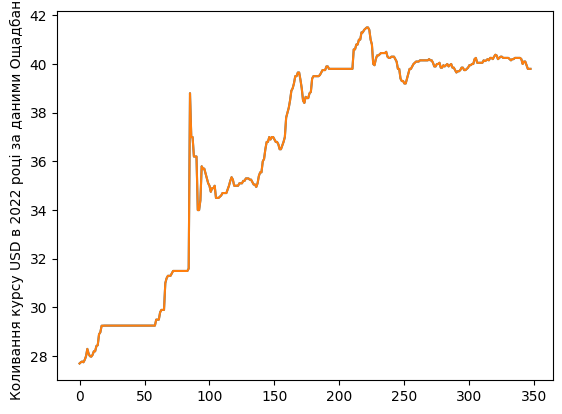

------------ Коливання курсу USD в 2022 році за даними Ощадбанк -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= -0.09548375755082894
дисперсія ВВ = 0.9891767028531209
СКВ ВВ= 0.9945736286736748
-----------------------------------------------------


In [16]:
# -------------------------------- БЛОК ГОЛОВНИХ ВИКЛИКІВ ------------------------------

# ------------------------------ Джерело вхідних даних ---------------------------

SV_AV = file_parsing('https://www.oschadbank.ua/rates-archive',
                     '/content/drive/MyDrive/Colab Notebooks/Data/Oschadbank (USD).xls', 'Купівля')  # реальні дані

S0 = SV_AV
n = len(S0)
iter = int(n)  # кількість реалізацій ВВ
Plot_AV(SV_AV, SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')
Stat_characteristics_in(SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')

0      28.10
1      28.12
2      28.12
3      28.10
4      28.20
       ...  
343    40.80
344    40.70
345    40.60
346    40.60
347    40.55
Name: Продаж, Length: 348, dtype: float64
Джерело даних:  https://www.oschadbank.ua/rates-archive


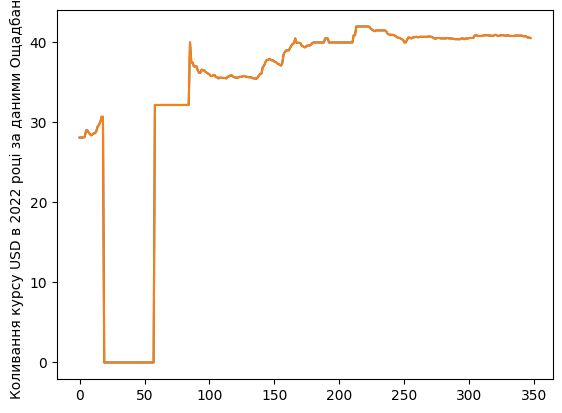

------------ Коливання курсу USD в 2022 році за даними Ощадбанк -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= 0.2243231691173122
дисперсія ВВ = 63.896746894523595
СКВ ВВ= 7.993544075973035
-----------------------------------------------------


In [17]:
# ------------------------------ Джерело вхідних даних ---------------------------

SV_AV = file_parsing('https://www.oschadbank.ua/rates-archive',
                     '/content/drive/MyDrive/Colab Notebooks/Data/Oschadbank (USD).xls', 'Продаж')  # реальні дані

S0 = SV_AV
n = len(S0)
iter = int(n)  # кількість реалізацій ВВ
Plot_AV(SV_AV, SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')
Stat_characteristics_in(SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')

0      27.9998
1      27.9619
2      27.9795
3      27.8756
4      28.0346
        ...   
343    36.5686
344    36.5686
345    36.5686
346    36.5686
347    36.5686
Name: КурсНбу, Length: 348, dtype: float64
Джерело даних:  https://www.oschadbank.ua/rates-archive


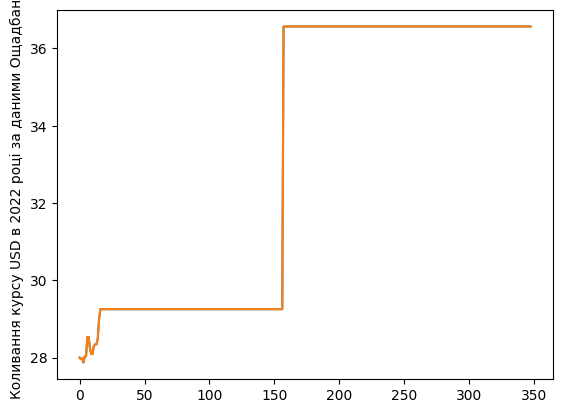

------------ Коливання курсу USD в 2022 році за даними Ощадбанк -------------
кількість елементів вбірки= 348
матиматичне сподівання ВВ= 0.08564579524963989
дисперсія ВВ = 3.0992465419830304
СКВ ВВ= 1.7604677054643831
-----------------------------------------------------


In [18]:
# ------------------------------ Джерело вхідних даних ---------------------------

SV_AV = file_parsing('https://www.oschadbank.ua/rates-archive',
                     '/content/drive/MyDrive/Colab Notebooks/Data/Oschadbank (USD).xls', 'КурсНбу')  # реальні дані
SV_AV=pd.DataFrame(SV_AV).replace(0, np.NaN).ffill()
SV_AV=np.array(SV_AV)

S0 = SV_AV
n = len(S0)
iter = int(n)  # кількість реалізацій ВВ
Plot_AV(SV_AV, SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')
Stat_characteristics_in(SV_AV, 'Коливання курсу USD в 2022 році за даними Ощадбанк')

In [19]:
'''
Аналіз отриманих результатів - верифікація математичних моделей та результатів розрахунків.

1. Задані характеристики вхідної вибірка:
часова надмірність даних із ЛІНІЙНИМ законом;
статистичні характеристики:
    закон розподілу ВВ - РІВНОМІРНИЙ
    n = 10000   # кількість реалізацій ВВ - об'єм вибірки
    dm = 0
    dsig = 5    # параметри рівномірного закону розподілу ВВ: середнє та СКВ

2. Визначені характеристики вхідної вибірки:
    часова надмірність даних із ЛІНІЙНИМ законом підтверджена графіком;

    статистичні характеристики:
    закон розподілу ВВ - РІВНОМІРНИЙ, підтверджено гістограмою;
    -----------------------------------------------------------------------

----- статистичні характеристики РІВНОМІРНОГО закону розподілу ВВ -----
    матиматичне сподівання ВВ= 4918.5
    дисперсія ВВ = 8417572.295387752
    СКВ ВВ= 2901.3052744217994

    ------------------------------------------------------------------

    ------- статистичні характеристики НОРМАЛЬНОЇ похибки вимірів -----
    матиматичне сподівання ВВ= 0.09830857749286681
    дисперсія ВВ = 24.54811687890349
    СКВ ВВ= 4.9546056229435145
    ------------------------------------------------------------------


    ------------ Вибірка + рівномірний. шум -------------
    кількість елементів вбірки= 10000
    матиматичне сподівання ВВ= 0.09171648036436864
    дисперсія ВВ = 24.545064399785183
    СКВ ВВ= 4.954297568756361
    -----------------------------------------------------

    -------------------------------------------------------------------

    ------------ Вибірка з АВ -------------
    кількість елементів вбірки= 10000
    матиматичне сподівання ВВ= -0.03580456111507857
    дисперсія ВВ = 28.458720768567215
    СКВ ВВ= 5.334671570824882
    -----------------------------------------------------


3. Висновок
Відповідність заданих та обрахованих числових характеристик статистичної вибірки доводять адекватність розрахунків.
Розроблений скрипт можна використовувати для визначення статистичних характеристик реальних даних.

'''
print("END")

END


## HW-7

In [20]:
# --------------------------------- Кластерний аналіз ---------------------------

'''

прикладний кластерний аналіз:
демонстрація можливостей бібліотек з тестовими даними

'''

# Scikit-learn -  бібліотека машинного навчання
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# scipy - бібліотека високоякісних інструментів для дослыдження даних
from scipy.cluster.hierarchy import linkage, dendrogram

# seaborn - бібліотека візуалізації даних з інструментів scipy
import seaborn as sns; sns.set()

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings  # ігнорування попереджень (про явну трансформацію даних до int-типу)
warnings.filterwarnings("ignore")


In [40]:

# ------------------------ ФУНКЦІЯ парсингу реальних даних --------------------------
def file_parsing (File_name, Data_name):
    d = pd.read_excel(File_name)
    for name, values in d[[Data_name]].items():
        print(values)
    print(len(values))
    S_real = np.zeros((len(values), len(values)))
    for i in range(len(values)):
        S_real[0, i] = i
        S_real[1, i] = values[i]
        print(S_real[0, i],' ', S_real[1, i])

    return S_real

In [22]:
def KMeans_1 ():
    # --------------------- Метод кластеризації KMeans 1 ------------------------
    # ------------------------- Підготовка вхідних даних ----------------------
    iris_df = datasets.load_iris()  # Завантаження типових даних - ірісів Фішера

    '''
    Див. докладно про вхідні тестові дані та іріси фішера:
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html

    '''

    print(dir(iris_df))  # Перелік доступних методів - наборів даних
    print(iris_df.feature_names)  # Ознаки
    print(iris_df.target)  # Міткі
    print(iris_df.target_names)  # Імена міток
    # -------------------- Розбиття наборів даних -----------------------------
    x_axis = iris_df.data[:, 0]
    y_axis = iris_df.data[:, 1]
    # -------------------- Відображення сегменту даних ------------------------
    plt.xlabel(iris_df.feature_names[0])
    plt.ylabel(iris_df.feature_names[1])
    plt.scatter(x_axis, y_axis, c=iris_df.target)
    plt.show()
    # --------------------- Метод кластеризації KMeans 1 ------------------------
    iris_df = datasets.load_iris()  # Завантаження даних
    model = KMeans(n_clusters=3)  # KMeans
    model.fit(iris_df.data)
    predicted_label = model.predict([[7.2, 3.5, 0.8, 1.6]])
    all_predictions = model.predict(iris_df.data)
    print(predicted_label)
    print(all_predictions)
    # -------------------- Відображення сегменту даних ------------------------
    plt.xlabel(iris_df.feature_names[0])
    plt.ylabel(iris_df.feature_names[1])
    plt.scatter(x_axis, y_axis, c=iris_df.target)
    plt.scatter(x_axis, all_predictions, c=iris_df.target)
    plt.show()

    return


In [23]:
def KMeans_2 ():
    # --------------------- Метод кластеризації KMeans 2 ------------------------
    # ---- Генерація даних ---------------
    X, y_true = make_blobs(n_samples=500, centers=4, cluster_std=0.40, random_state=0)

    '''
    Створення модельних / тестових даних для кластерного аналізу
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html

    '''

    plt.scatter(X[:, 0], X[:, 1], s=50)
    plt.show()
    # ---- Кластерний аналіз ---------------
    kmeans = KMeans(n_clusters=4)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

    return

In [53]:
def KMeans_3 (X, n_clusters=4):
    # --------------------- Метод кластеризації KMeans 3 ------------------------
    plt.scatter(X[:, 0], X[:, 1], s=50)
    plt.show()

    # ---- Кластерний аналіз ---------------
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

    return

In [56]:
def KMeans_4 (X, n_clusters=4):
    # --------------------- Метод кластеризації KMeans 4 ------------------------
    pca = decomposition.PCA(n_components=5)
    pca.fit(X)
    X = pca.transform(X)

    plt.scatter(X[:, 0], X[:, 1], s=50)
    plt.show()

    # ---- Кластерний аналіз ---------------
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
    centers = kmeans.cluster_centers_
    plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)
    plt.show()

    return

In [25]:
def Hierarchy ():
    # ------------------------ Ієрархічна кластеризація ------------------------

    # формування сегменту вхідних даних як масив просторових точок 2-х кластерів
    X = np.array(
        [[7, 8], [12, 20], [17, 19], [26, 15], [32, 37], [87, 75], [73, 85], [62, 80], [73, 60], [87, 96], ])
    labels = range(1, 11)
    plt.figure(figsize=(10, 7))
    plt.subplots_adjust(bottom=0.1)
    plt.scatter(X[:, 0], X[:, 1], label='True Position')
    for label, x, y in zip(labels, X[:, 0], X[:, 1]):
        plt.annotate(
            label, xy=(x, y), xytext=(-3, 3), textcoords='offset points', ha='right', va='bottom')
    plt.show()

    # будується дендограмма вхідних даних за допомогою Scipy, що дає "навчання" у визначенні 2-х класів
    linked = linkage(X, 'single')
    labelList = range(1, 11)
    plt.figure(figsize=(10, 7))
    dendrogram(linked, orientation='top', labels=labelList,
               distance_sort='descending', show_leaf_counts=True)
    '''
    Дендограмма: діаграма, що зображує дерево рішень - схематичне зображення  використовується в ієрархічній кластеризації
    вона ілюструє розташування кластерів, отриманих за результатами аналізу даних

    '''

    plt.show()

    # за критерієм максимальної відстані формуються кластери даних
    cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
    cluster.fit_predict(X)
    plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap='rainbow')
    plt.show()

    return

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


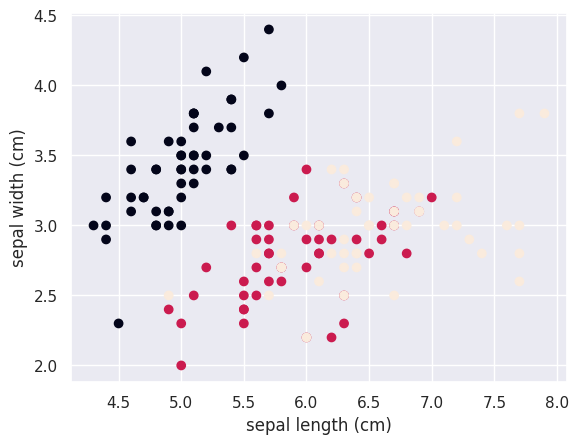

[1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


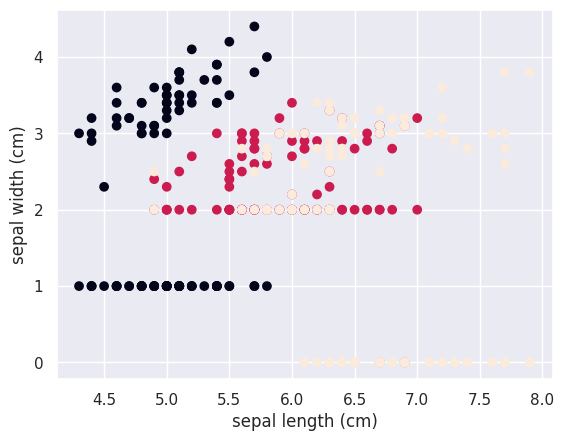

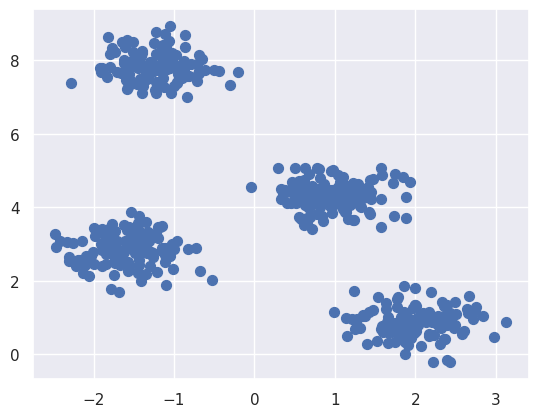

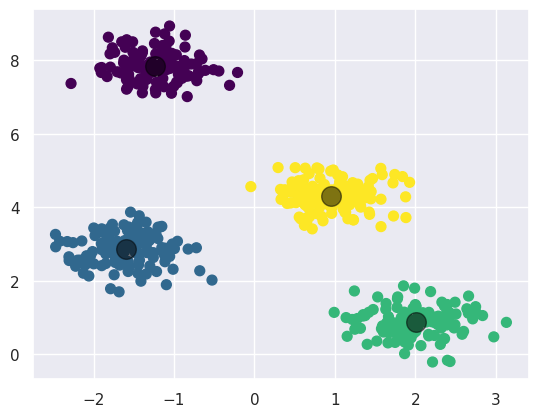

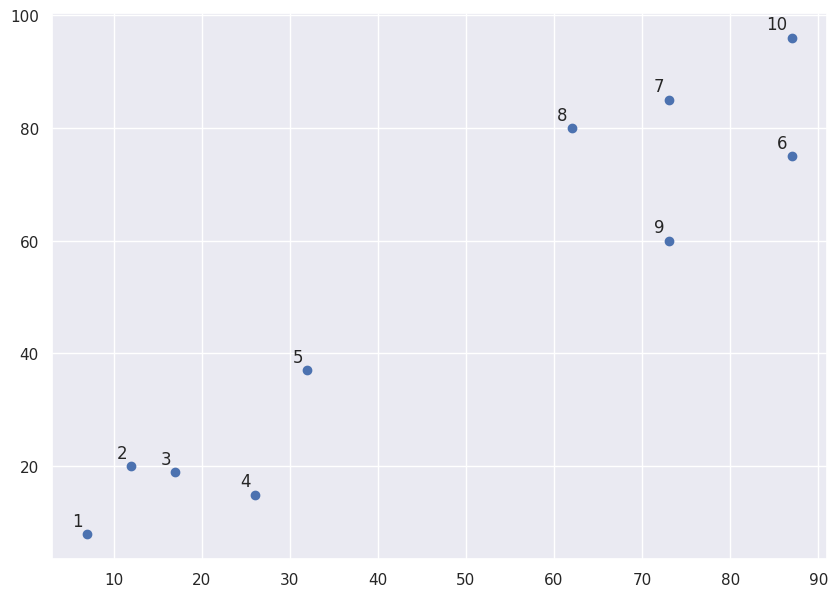

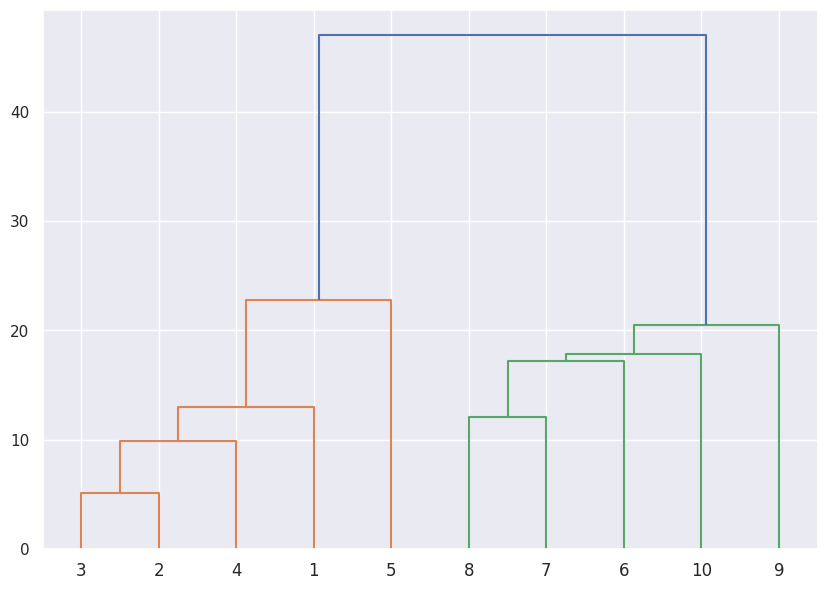

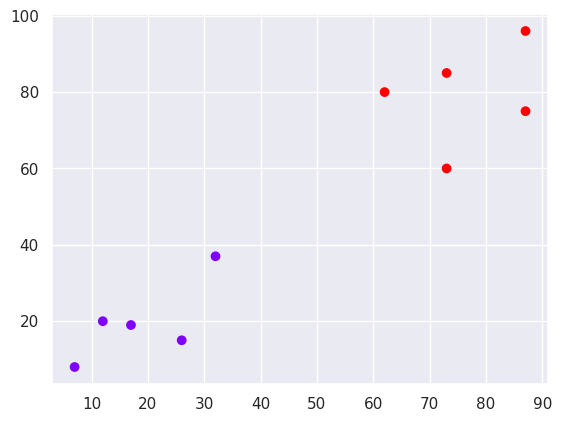

In [54]:

KMeans_1()
KMeans_2()
Hierarchy()

0      28.10
1      28.12
2      28.12
3      28.10
4      28.20
       ...  
343    40.80
344    40.70
345    40.60
346    40.60
347    40.55
Name: Продаж, Length: 348, dtype: float64
348
0.0   28.1
1.0   28.12
2.0   28.12
3.0   28.1
4.0   28.2
5.0   29.0
6.0   29.0
7.0   28.75
8.0   28.55
9.0   28.38
10.0   28.5
11.0   28.65
12.0   28.65
13.0   28.98
14.0   29.5
15.0   29.7
16.0   30.1
17.0   30.7
18.0   30.7
19.0   0.0
20.0   0.0
21.0   0.0
22.0   0.0
23.0   0.0
24.0   0.0
25.0   0.0
26.0   0.0
27.0   0.0
28.0   0.0
29.0   0.0
30.0   0.0
31.0   0.0
32.0   0.0
33.0   0.0
34.0   0.0
35.0   0.0
36.0   0.0
37.0   0.0
38.0   0.0
39.0   0.0
40.0   0.0
41.0   0.0
42.0   0.0
43.0   0.0
44.0   0.0
45.0   0.0
46.0   0.0
47.0   0.0
48.0   0.0
49.0   0.0
50.0   0.0
51.0   0.0
52.0   0.0
53.0   0.0
54.0   0.0
55.0   0.0
56.0   0.0
57.0   0.0
58.0   32.18
59.0   32.18
60.0   32.18
61.0   32.18
62.0   32.18
63.0   32.18
64.0   32.18
65.0   32.18
66.0   32.18
67.0   32.18
68.0   32.18
69.0   32.18


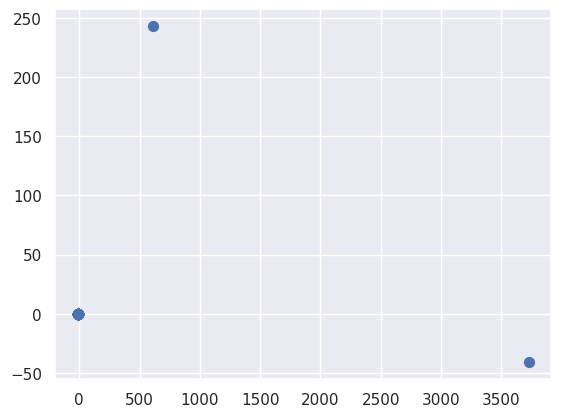

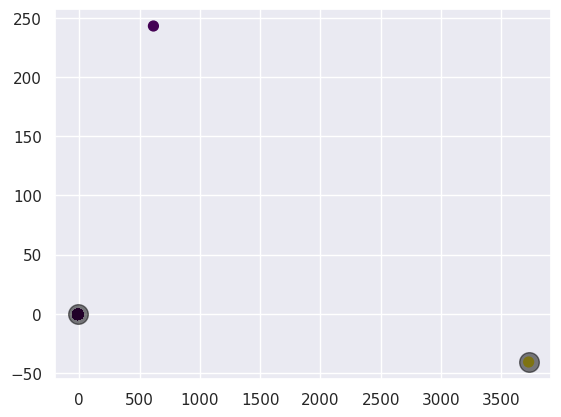

In [62]:
KMeans_3(X = file_parsing('/content/drive/MyDrive/Colab Notebooks/Data/Oschadbank (USD).xls', 'Продаж'), n_clusters=2)

0      27.70
1      27.75
2      27.78
3      27.75
4      27.85
       ...  
343    40.10
344    39.95
345    39.80
346    39.80
347    39.80
Name: Купівля, Length: 348, dtype: float64
348
0.0   27.7
1.0   27.75
2.0   27.78
3.0   27.75
4.0   27.85
5.0   28.0
6.0   28.3
7.0   28.1
8.0   28.0
9.0   27.98
10.0   28.05
11.0   28.2
12.0   28.2
13.0   28.42
14.0   28.45
15.0   28.9
16.0   28.98
17.0   29.25
18.0   29.25
19.0   29.2549
20.0   29.2549
21.0   29.2549
22.0   29.2549
23.0   29.2549
24.0   29.2549
25.0   29.2549
26.0   29.2549
27.0   29.2549
28.0   29.2549
29.0   29.2549
30.0   29.2549
31.0   29.2549
32.0   29.2549
33.0   29.2549
34.0   29.2549
35.0   29.2549
36.0   29.2549
37.0   29.2549
38.0   29.2549
39.0   29.2549
40.0   29.2549
41.0   29.2549
42.0   29.2549
43.0   29.2549
44.0   29.2549
45.0   29.2549
46.0   29.2549
47.0   29.2549
48.0   29.2549
49.0   29.2549
50.0   29.2549
51.0   29.2549
52.0   29.2549
53.0   29.2549
54.0   29.2549
55.0   29.2549
56.0   29.2549
57.0   29.2

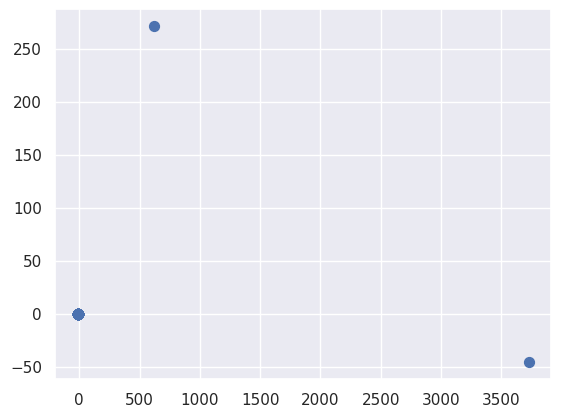

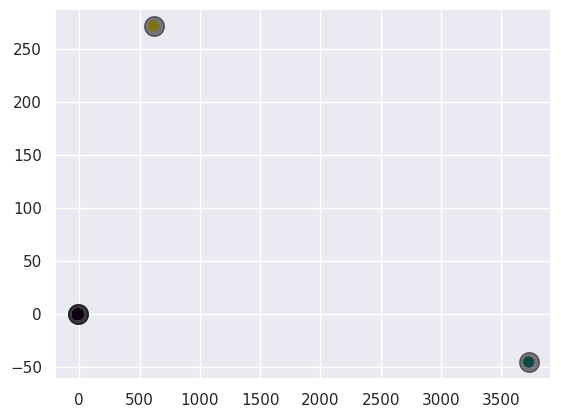

In [63]:
KMeans_3(X = file_parsing('/content/drive/MyDrive/Colab Notebooks/Data/Oschadbank (USD).xls', 'Купівля'))

0      27.9998
1      27.9619
2      27.9795
3      27.8756
4      28.0346
        ...   
343    36.5686
344    36.5686
345    36.5686
346    36.5686
347    36.5686
Name: КурсНбу, Length: 348, dtype: float64
348
0.0   27.9998
1.0   27.9619
2.0   27.9795
3.0   27.8756
4.0   28.0346
5.0   28.0346
6.0   28.5355
7.0   28.5355
8.0   28.2424
9.0   28.0943
10.0   28.0943
11.0   28.3
12.0   28.3428
13.0   0.0
14.0   28.4846
15.0   28.9877
16.0   29.2549
17.0   29.2549
18.0   29.2549
19.0   29.2549
20.0   29.2549
21.0   29.2549
22.0   29.2549
23.0   29.2549
24.0   29.2549
25.0   29.2549
26.0   29.2549
27.0   29.2549
28.0   29.2549
29.0   29.2549
30.0   29.2549
31.0   29.2549
32.0   29.2549
33.0   29.2549
34.0   29.2549
35.0   29.2549
36.0   29.2549
37.0   0.0
38.0   0.0
39.0   29.2549
40.0   29.2549
41.0   0.0
42.0   0.0
43.0   0.0
44.0   0.0
45.0   29.2549
46.0   29.2549
47.0   29.2549
48.0   29.2549
49.0   29.2549
50.0   29.2549
51.0   29.2549
52.0   29.2549
53.0   29.2549
54.0   29.2549
55.0

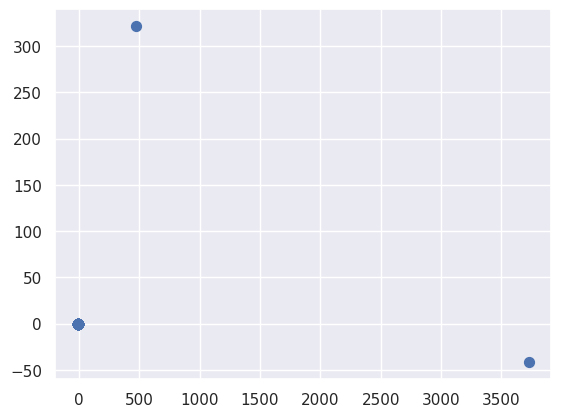

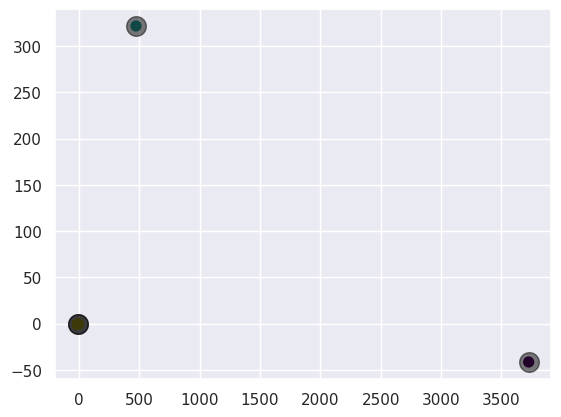

In [64]:
KMeans_3(X = file_parsing('/content/drive/MyDrive/Colab Notebooks/Data/Oschadbank (USD).xls', 'КурсНбу'))

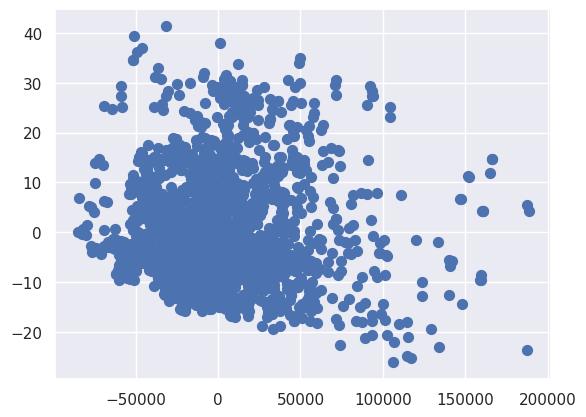

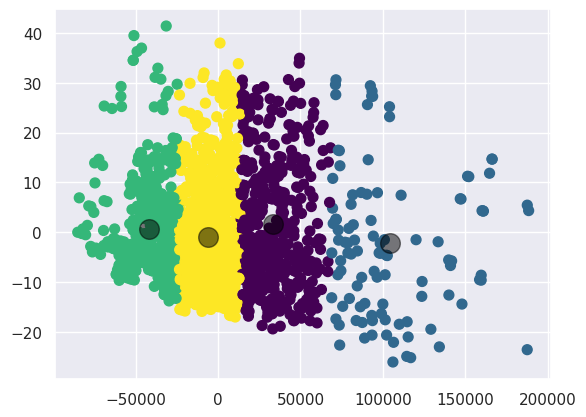

In [65]:
X=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/segmentation data.csv", index_col='ID').values
KMeans_4(X, n_clusters=4)

Висновок: немає сенсу робити кластерізації курсу валют, то я використала інші данні. Кластеризація за допомогою K-means в поєднанні зі зменшення розмірності за допомогою PCA дають можливість визначити основні групи клієнтів в датасеті про продажі.